In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

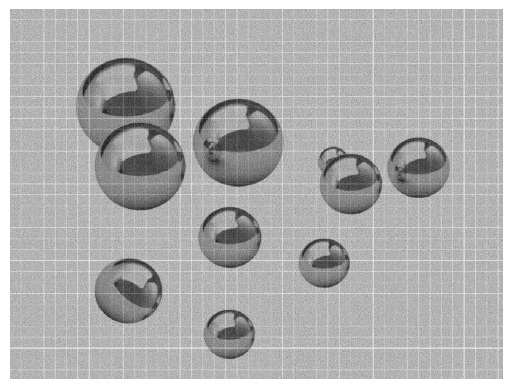

In [27]:
image = cv2.imread('./figure/MetalBallsNoise.tif', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

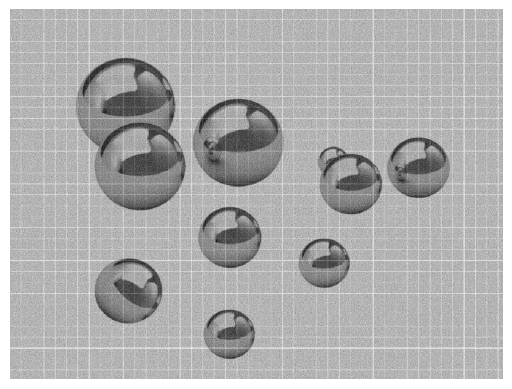

In [28]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

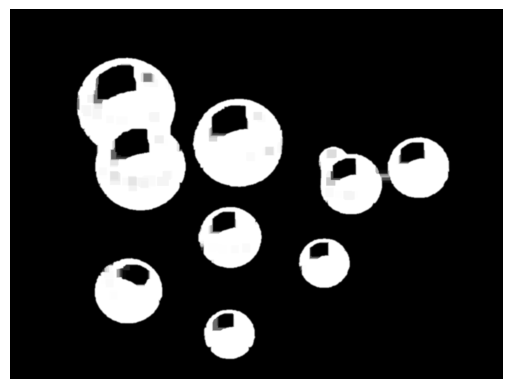

In [29]:
thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
thresh = cv2.medianBlur(thresh, 5)
thresh = cv2.GaussianBlur(thresh, (5, 5), 0)
# close operation 4 times
kernel = np.ones((5, 5), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

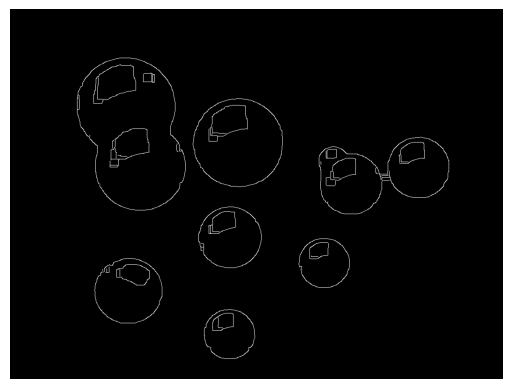

In [30]:
edged = cv2.Canny(thresh, 30, 150)
plt.imshow(edged, cmap='gray')
plt.axis('off')
plt.show()

7 contours found!


(-0.5, 1051.5, 789.5, -0.5)

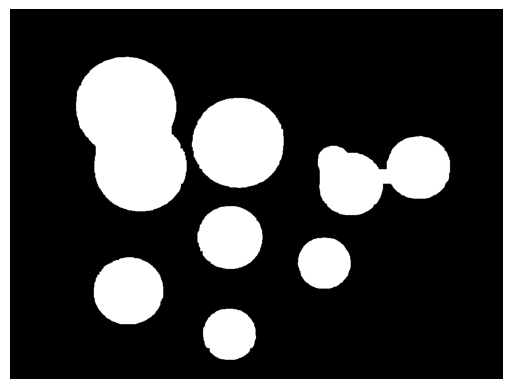

In [31]:
# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contours found!')

# draw a binary image with countours, all white inside the contour
blank = np.zeros(image.shape, dtype='uint8')
cv2.drawContours(blank, contours, -1, (255, 255, 255), cv2.FILLED)
blank = cv2.cvtColor(blank, cv2.COLOR_BGR2GRAY)
plt.imshow(blank, cmap='gray')
plt.axis('off')


10 circles found!


(-0.5, 1051.5, 789.5, -0.5)

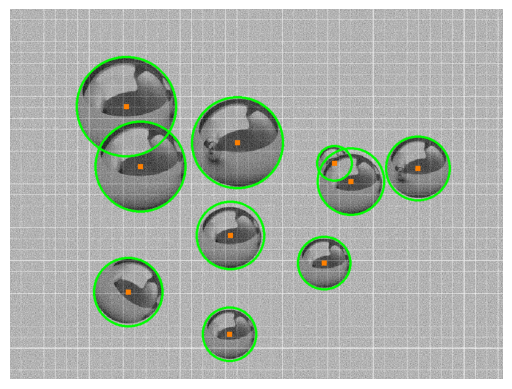

In [32]:
# detect circles in the countours
rows = blank.shape[0]
circles = cv2.HoughCircles(blank, cv2.HOUGH_GRADIENT, 2.2, rows / 16,
                               param1=100, param2=40,
                               minRadius=0, maxRadius=120)
# circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1, 100, param1=50, param2=30, minRadius=0, maxRadius=0)

image_show = image.copy()
if circles is not None:
    print(f'{len(circles[0, :])} circles found!')
    circles = np.round(circles[0, :]).astype('int')
    for (x, y, r) in circles:
        cv2.circle(image_show, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(image_show, (x-5, y-5), (x+5, y+5), (0, 128, 255), -1)
        
plt.imshow(cv2.cvtColor(image_show, cv2.COLOR_BGR2RGB))
plt.axis('off')